In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#reading the training data
cr_training = pd.read_csv(r"D:\Edvancer Python Projects\Project2/carvan_train.csv")

#reading the training data
cr_testing = pd.read_csv(r"D:\Edvancer Python Projects\Project2/carvan_test.csv")

print(cr_training.shape)

cr_testing.shape

(5822, 86)


(4000, 85)

In [7]:
cr_training.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [8]:
# This are all the categorical columns 
['V1','V4','V5','V6','V44'] 

['V1', 'V4', 'V5', 'V6', 'V44']

In [9]:
k = cr_training.groupby("V1")["V86"].value_counts().unstack()
k [1] = k[1].fillna(value = 0)
k.sort_values(1,ascending= False).T
# as we can see that most % CTR(Click Through Rate) are from "Middle class families" - 51
#followed by then by Affluent young families

V1,8,33,3,38,39,36,12,1,13,6,...,26,27,28,21,18,17,16,15,40,19
V86,,,,,,,,,,,,,,,,,,,,,
0,288.0,764.0,224.0,316.0,309.0,209.0,95.0,111.0,166.0,107.0,...,47.0,49.0,25.0,15.0,19.0,9.0,16.0,5.0,71.0,3.0
1,51.0,46.0,25.0,23.0,19.0,16.0,16.0,13.0,13.0,12.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


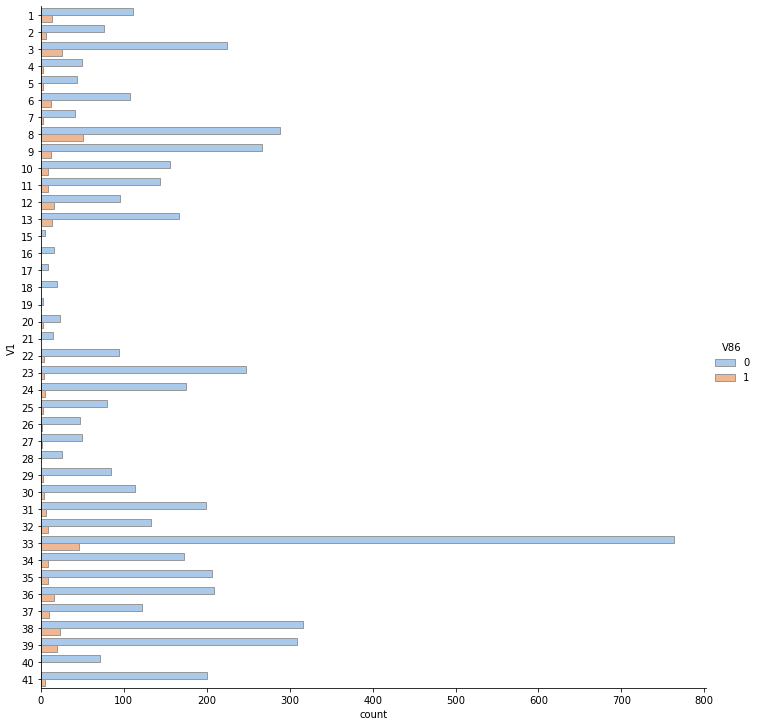

In [10]:
#plt.figure(figsize=(30,9))
sns.catplot(y="V1", hue="V86", kind="count",height=10,
            palette="pastel", edgecolor=".6",
            data=cr_training)

### This category V4 i.e the "average age" the %CTR for the age group 60-70   years is the maximum from those group there are actual 6% conversions

L1:

1 20-30 years
2 30-40 years
3 40-50 years
4 50-60 years
5 60-70 years
6 70-80 years

In [11]:
k = cr_training.groupby("V4")["V86"].value_counts(normalize = True).unstack()
k [1] = k[1].fillna(value = 0)
k.sort_values(1,ascending= False).T

V4,5,3,2,4,6,1
V86,,,,,,
0,0.937824,0.939,0.940083,0.940354,0.966667,0.986486
1,0.062176,0.061,0.059917,0.059646,0.033333,0.013514


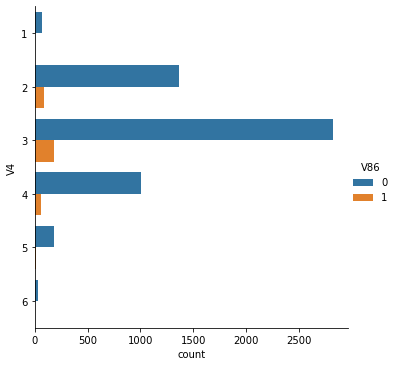

In [12]:
# Lets Visualize the above 
sns.catplot(y = "V4",data = cr_training, kind = "count",hue = "V86",height = 5)

### This category V5 i.e the "Customer main type" the CTR for "Driven Growers" is the maximum from those group 13%  are the actual conversion followed by "Successful hedonists" -  8%

L2:

1 Successful hedonists
2 Driven Growers
3 Average Family
4 Career Loners
5 Living well
6 Cruising Seniors
7 Retired and Religeous
8 Family with grown ups
9 Conservative families
10 Farmers

In [13]:
k = cr_training.groupby("V5")["V86"].value_counts(normalize = True).unstack()
k [1] = k[1].fillna(value = 0)
k.sort_values(1,ascending= False).T

V5,2,1,3,9,8,7,5,6,10,4
V86,,,,,,,,,,
0,0.868526,0.913043,0.933409,0.937031,0.943058,0.963636,0.973638,0.980488,0.981884,1.0
1,0.131474,0.086957,0.066591,0.062969,0.056942,0.036364,0.026362,0.019512,0.018116,0.0


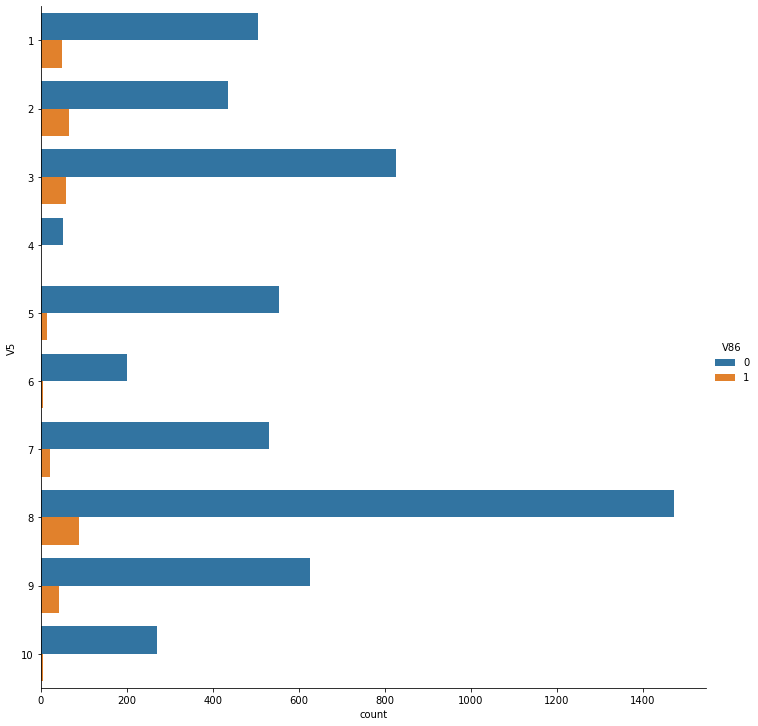

In [14]:
# Lets Visualize the above 
sns.catplot(y = "V5",data = cr_training,kind = "count",hue = "V86",height = 10)

### This category V6 i.e the "Roman Catholic" the CTR for "63 - 75%" is the maximum from those group 7.69%  are the actual conversion followed by "11 - 23%" -  7.3%

L3: Roman Catholic

0 0%
1 1 - 10%
2 11 - 23%
3 24 - 36%
4 37 - 49%
5 50 - 62%
6 63 - 75%
7 76 - 88%
8 89 - 99%
9 100%

In [15]:
k = cr_training.groupby("V6")["V86"].value_counts().unstack()
k [1] = k[1].fillna(value = 0)
k.sort_values(1,ascending= False).T

V6,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,3051.0,1492.0,679.0,145.0,65.0,17.0,12.0,6.0,3.0,4.0
1,177.0,107.0,54.0,7.0,1.0,1.0,1.0,0.0,0.0,0.0


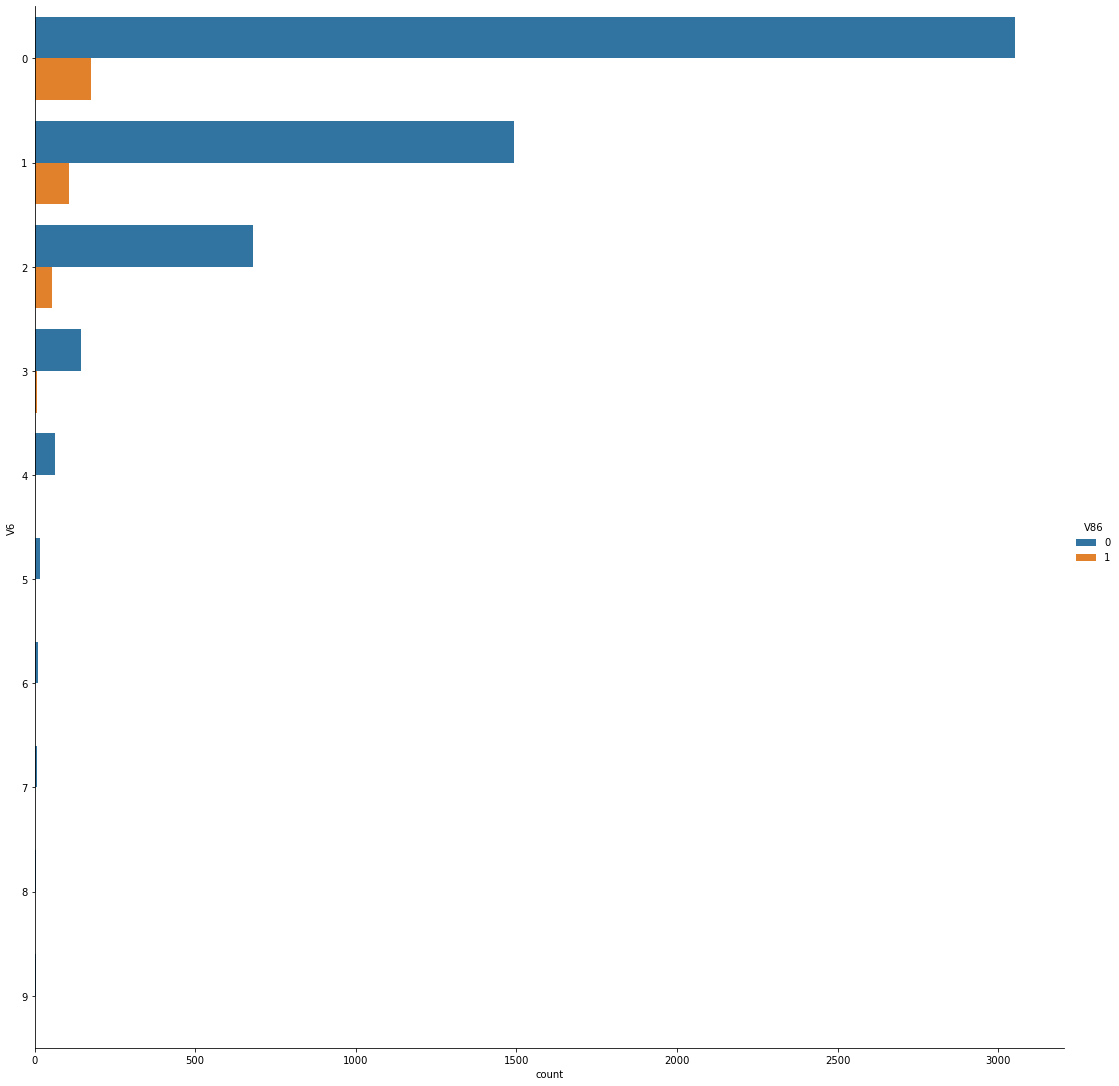

In [16]:
# Lets Visualize the above 
sns.catplot(y = "V6",data = cr_training, kind = "count",hue = "V86",height = 15)

### This category V44 i.e the "Contribution private third party insurance" the CTR for "f 100 – 199" is the maximum from those group 18.18%  are the actual conversion followed by "f 50 – 99" -  8.9%

In [17]:
k = cr_training.groupby("V44")["V86"].value_counts(normalize = True).unstack()
k [1] = k[1].fillna(value = 0)
k.sort_values(1,ascending= False).T

V44,3,2,0,1
V86,,,,
0,0.818182,0.910244,0.957783,0.960199
1,0.181818,0.089756,0.042217,0.039801


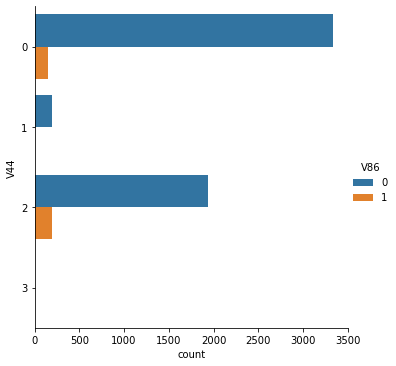

In [18]:
sns.catplot(y = "V44", data = cr_training, kind = "count", height = 5, hue = "V86")

In [19]:
# Adding a columns named data to later on differentiate between training and testing data
cr_training['data'] = 'training'
cr_testing['data'] = 'testing'

In [20]:
# in order to make the shape of testing data same as that of training adding a column.
cr_testing['V86'] = np.nan

#Concatenating the training and testing data
crall = pd.concat([cr_training,cr_testing],axis='index')

crall.head()

,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,...,V8,V80,V81,V82,V83,V84,V85,V86,V9,data
0,33,7,0,2,1,2,6,1,2,7,...,1,1,0,0,0,0,0,0.0,3,training
1,37,6,2,2,0,4,5,0,5,4,...,1,1,0,0,0,0,0,0.0,4,training
2,37,3,2,4,4,4,2,0,5,4,...,2,1,0,0,0,0,0,0.0,4,training
3,9,5,2,2,2,3,4,3,4,2,...,2,1,0,0,0,0,0,0.0,4,training
4,40,7,1,2,2,4,4,5,4,0,...,1,1,0,0,0,0,0,0.0,4,training


In [21]:
crall['V86'].value_counts(normalize =True)

0.0    0.940227
1.0    0.059773
Name: V86, dtype: float64

In [22]:
# This are all the categorical columns 
cat_cols = ['V1','V4','V5','V6','V44'] 

In [23]:
# Creating dummies(one hot enciding) out of categrical columns
for col in cat_cols:
    freqs = crall[col].value_counts()
    k = freqs.index[freqs>10][:-1]
    for cat in k:
        name = str(col) + "_" + str(cat)
        crall[name] = (crall[col] == cat).astype(int)
    del crall[col]
    print(col)

V1
V4
V5
V6
V44


In [24]:
# Since the preprocessing is done on the dataframe splitting the data back in training and testing 
cartrain = crall.loc[crall["data"]=="training",:] 

cartest = crall.loc[crall["data"]=="testing",:]

In [25]:
# cartrain_independent = cartrain.drop(["V86",'data'],axis = 1)
# cartrain_dependent = cartrain["V86"]

In [26]:
cartest.head()

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,...,V6_0,V6_1,V6_2,V6_3,V6_4,V6_5,V6_6,V44_0,V44_2,V44_1
0,5,0,4,1,1,8,2,2,6,0,...,1,0,0,0,0,0,0,0,0,1
1,5,2,2,1,4,5,5,4,0,5,...,1,0,0,0,0,0,0,0,1,0
2,5,2,3,2,3,6,2,4,4,2,...,0,1,0,0,0,0,0,0,1,0
3,5,4,1,2,4,4,2,4,4,2,...,0,0,1,0,0,0,0,0,1,0
4,9,0,0,0,6,3,0,0,9,0,...,1,0,0,0,0,0,0,0,1,0


In [27]:
# Checking out for correlation 

In [28]:
cartrain.shape

(5822, 143)

In [29]:
# Performing train-test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
cartrain_train , cartrain_test = train_test_split(cartrain,test_size = 0.2, random_state = 42,
                                                  stratify = cartrain["V86"])

In [32]:
cartrain_train.V86.value_counts(normalize=True)

0.0    0.940305
1.0    0.059695
Name: V86, dtype: float64

In [33]:
cartrain_test.V86.value_counts(normalize=True)

0.0    0.939914
1.0    0.060086
Name: V86, dtype: float64

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

D:\Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lm_model = LogisticRegression()

In [37]:
del cartrain_train["data"]
del cartrain_test["data"]

In [38]:
cartrain_train_independent = cartrain_train.drop("V86",axis = 1)
cartrain_train_dependent = cartrain_train["V86"]
cartrain_test_independent = cartrain_test.drop("V86",axis = 1)
cartrain_test_dependent = cartrain_test["V86"]

In [39]:
cartrain_train_independent.shape

(4657, 141)

In [40]:
cartrain_train_dependent.shape

(4657,)

In [37]:
lm_model.fit(cartrain_train_independent,cartrain_train_dependent)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
prediction_logistic = lm_model.predict_proba(cartrain_test_independent)
prediction_logistic

array([[0.94444858, 0.05555142],
       [0.80534926, 0.19465074],
       [0.9526945 , 0.0473055 ],
       ...,
       [0.95456566, 0.04543434],
       [0.95474787, 0.04525213],
       [0.96651429, 0.03348571]])

In [39]:
prediction_logistic[:,1]

array([0.05555142, 0.19465074, 0.0473055 , ..., 0.04543434, 0.04525213,
       0.03348571])

In [40]:
cutoffs = np.linspace(0.0,0.99,100)
cutoffs

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [0]:
prediction_logistic = lm_model.predict_proba(cartrain_test_independent)[:,1]
real = cartrain_test_dependent

In [42]:
(prediction_logistic > 0.08).astype(int)

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
KS_all = []
for cutoff in cutoffs:
    predicted = (prediction_logistic>cutoff).astype(int)
    
    TP = ((predicted==1) & (real==1)).sum()
    TN = ((predicted==0) & (real==0)).sum()
    FP = ((predicted==1) & (real==0)).sum()
    FN = ((predicted==0) & (real==1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P)-(FP/N)
    KS_all.append(KS)

In [0]:
#list(zip(cutoffs,KS_all))

In [0]:
mycutoff = cutoffs[KS_all == max(KS_all)][0]

In [46]:
mycutoff

0.08

In [0]:
lm_hardclasses = (prediction_logistic>mycutoff).astype(int)

In [48]:
lm_hardclasses.sum()

253

# Lets Build a confusion matrix

In [49]:
pd.crosstab(real,lm_hardclasses)

col_0,0,1
V86,,
0.0,881,214
1.0,31,39


In [50]:
df = pd.DataFrame(list(zip(real,lm_hardclasses)),columns=["Real","Predicted"])

pd.crosstab(df["Real"], df["Predicted"])

Predicted,0,1
Real,,
0.0,881,214
1.0,31,39


In [51]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(real , lm_hardclasses)

score

0.6808545335942596

# Using Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_model = RandomForestClassifier()

In [54]:
rf_model.fit(cartrain_train_independent,cartrain_train_dependent)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rf_predicted = rf_model.predict_proba(cartrain_test_independent)[:,1]
rf_predicted

array([0.1, 0.9, 0. , ..., 0.2, 0. , 0.2])

In [0]:
KS_all = []
for cutoff in cutoffs:
    predicted = (rf_predicted>cutoff).astype(int)
    
    TP = ((predicted==1) & (real==1)).sum()
    TN = ((predicted==0) & (real==0)).sum()
    FP = ((predicted==1) & (real==0)).sum()
    FN = ((predicted==0) & (real==1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P)-(FP/N)
    KS_all.append(KS)

In [0]:
mycutoff = cutoffs[KS_all == max(KS_all)][0]

In [58]:
mycutoff

0.06

In [0]:
rf_hardclasses = (rf_predicted > mycutoff).astype(int)

In [60]:
df = pd.DataFrame(list(zip(real,rf_hardclasses)),columns=["Real","Predicted"])

pd.crosstab(df["Real"], df["Predicted"])

Predicted,0,1
Real,,
0.0,749,346
1.0,31,39


In [61]:
roc_auc_score(real,rf_hardclasses)

0.6205805609915199

In [0]:
rf_train_data = rf_model.predict_proba(cartrain_train_independent)[:,1]

In [0]:
pred = (rf_train_data > mycutoff ).astype(int)

# Using XGBOOST 

In [0]:
# finding the best n_estimator
xgb_params = {
                "n_estimators": [100,500,700,900,1200,1500]
}

In [0]:
xgb1= XGBClassifier(learning_rate=0.1,subsample=0.8, colsample_bytree=0.8, colsample_bylevel=0.8)

In [0]:
from sklearn.model_selection import GridSearchCV # since there are not much parameters to tune therefore using grid search cv

In [0]:
grid_search = GridSearchCV(xgb1,cv=10,
                           param_grid=xgb_params,scoring='roc_auc',
                           verbose=2,
                           n_jobs=-1
                          )

In [68]:
grid_search.fit(cartrain_train_independent,cartrain_train_dependent)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=0.8, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 700, 900, 1200, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

In [0]:
def report(results, n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==1)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
            results["mean_test_score"][candidate],
            results["std_test_score"][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
        print("")

In [70]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.755 (std: 0.030)
Parameters: {'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.755 (std: 0.030)
Parameters: {'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.755 (std: 0.030)
Parameters: {'n_estimators': 100}



In [0]:
xgb_params = {
    "gamma":[0,2,5,8,10], 
    "min_child_weight":[0.5,1,2,5,10],
    "max_depth":[2,3,4,5,6,7,8]
}

In [0]:
xgb2 = XGBClassifier(learning_rate=0.1,subsample=0.8, colsample_bytree=0.8, colsample_bylevel=0.8,n_estimators=100)

In [0]:
random_search_ =RandomizedSearchCV(xgb2,param_distributions=xgb_params,n_iter=20,cv=10,scoring='roc_auc',n_jobs=-1,verbose=2)

In [74]:
random_search_.fit(cartrain_train_independent,cartrain_train_dependent)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=0.8,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.8, verbosity=1),
   

In [75]:
report(random_search_.cv_results_)

Model with rank: 1
Mean validation score: 0.752 (std: 0.034)
Parameters: {'min_child_weight': 0.5, 'max_depth': 3, 'gamma': 0}

Model with rank: 2
Mean validation score: 0.752 (std: 0.034)
Parameters: {'min_child_weight': 0.5, 'max_depth': 3, 'gamma': 0}

Model with rank: 3
Mean validation score: 0.752 (std: 0.034)
Parameters: {'min_child_weight': 0.5, 'max_depth': 3, 'gamma': 0}



In [0]:
xgb_params = {
    "gamma":[5,6,7,8],
    "max_delta_step":[1,3,6,10],
    "scale_pos_weight":[3,7,11,15]
}

In [0]:
xgb3 = XGBClassifier(learning_rate=0.1,subsample=0.8, colsample_bytree=0.8, colsample_bylevel=0.8,n_estimators=100,
                    min_child_weight=2,max_depth=3)

In [0]:
Random__search=RandomizedSearchCV(xgb3,param_distributions=xgb_params,scoring="roc_auc",n_jobs=-1,verbose=10,cv=10,n_iter=20)

In [79]:
Random__search.fit(cartrain_train_independent,cartrain_train_dependent)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=0.8,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=2,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.8, verbosity=1),
   

In [80]:
report(Random__search.cv_results_)

Model with rank: 1
Mean validation score: 0.756 (std: 0.031)
Parameters: {'scale_pos_weight': 7, 'max_delta_step': 1, 'gamma': 7}

Model with rank: 2
Mean validation score: 0.756 (std: 0.031)
Parameters: {'scale_pos_weight': 7, 'max_delta_step': 1, 'gamma': 7}

Model with rank: 3
Mean validation score: 0.756 (std: 0.031)
Parameters: {'scale_pos_weight': 7, 'max_delta_step': 1, 'gamma': 7}



In [0]:
xgb_params = {
    "subsample": [i/10 for i in range(5 , 11)], 
    "colsample_bytree": [i/10 for i in range(5 , 11)],
    "colsample_bylevel" :[i/10 for i in range(5 , 11)]
}

In [0]:
xgb5 = XGBClassifier(learning_rate=0.1,n_estimators=100,
                    min_child_weight=2,max_depth=3,scale_pos_weight=3,max_delta_step=1,gamma=7)

In [0]:
random___search = RandomizedSearchCV(xgb5,param_distributions=xgb_params,verbose=10,scoring = "roc_auc",cv = 10 , n_iter=20)

In [84]:
random___search.fit(cartrain_train_independent,cartrain_train_dependent)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.791, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.715, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.756, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.694, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.763, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.814, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.5s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.724, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.1s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.769, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.6s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.757, total=   1.6s
[CV] subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0 ......


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.2s remaining:    0.0s


[CV]  subsample=0.6, colsample_bytree=0.8, colsample_bylevel=1.0, score=0.719, total=   1.6s
[CV] subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6 ......
[CV]  subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6, score=0.812, total=   1.0s
[CV] subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6 ......
[CV]  subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6, score=0.731, total=   1.0s
[CV] subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6 ......
[CV]  subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6, score=0.759, total=   1.0s
[CV] subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6 ......
[CV]  subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6, score=0.686, total=   1.0s
[CV] subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6 ......
[CV]  subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6, score=0.759, total=   1.0s
[CV] subsample=0.9, colsample_bytree=1.0, colsample_bylevel=0.6 ......
[CV]  subsample=

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.7min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=7,
                                           learning_rate=0.1, max_delta_step=1,
                                           max_depth=3, min_child_weight=2,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=3,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
         

In [85]:
report(random___search.cv_results_)

Model with rank: 1
Mean validation score: 0.756 (std: 0.037)
Parameters: {'subsample': 0.6, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8}

Model with rank: 2
Mean validation score: 0.756 (std: 0.037)
Parameters: {'subsample': 0.6, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.756 (std: 0.037)
Parameters: {'subsample': 0.6, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8}



In [0]:
xgb_params = {
    "reg_alpha":[i/10 for i in range(0,50)], 
    "reg_lambda":[i/10 for i in range(0,50)]
}

In [0]:
xgb6 = XGBClassifier(learning_rate=0.1,n_estimators=100,subsample=0.8,colsample_bytree=0.6,colsample_bylevel=0.6,
                    min_child_weight=2,max_depth=3,scale_pos_weight=3,max_delta_step=1,gamma=7)

In [0]:
random___search = RandomizedSearchCV(xgb6,param_distributions=xgb_params,scoring="roc_auc",verbose=20,n_jobs=-1,cv=10,n_iter=20)

In [89]:
random___search.fit(cartrain_train_independent,cartrain_train_dependent)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=0.6,
                                           colsample_bynode=1,
                                           colsample_bytree=0.6, gamma=7,
                                           learning_rate=0.1, max_delta_step=1,
                                           max_depth=3, min_child_weight=2,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                                      0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0, 1.1, 1.2, 1.3, 1.4,
                                                      1.5, 1.6, 

In [90]:
report(random___search.cv_results_)

Model with rank: 1
Mean validation score: 0.753 (std: 0.036)
Parameters: {'reg_lambda': 0.5, 'reg_alpha': 3.2}

Model with rank: 2
Mean validation score: 0.753 (std: 0.036)
Parameters: {'reg_lambda': 0.5, 'reg_alpha': 3.2}

Model with rank: 3
Mean validation score: 0.753 (std: 0.036)
Parameters: {'reg_lambda': 0.5, 'reg_alpha': 3.2}



In [0]:
xgb7 = XGBClassifier(learning_rate=0.1,n_estimators=100,subsample=0.8,colsample_bytree=0.6,colsample_bylevel=0.6,
                    min_child_weight=2,max_depth=3,scale_pos_weight=3,max_delta_step=1,gamma=7,reg_lambda=0.5,reg_alpha=0.5)

In [92]:
random___search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.6, gamma=7,
              learning_rate=0.1, max_delta_step=1, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=3.2, reg_lambda=0.5, scale_pos_weight=3, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
xgbr = random___search.best_estimator_

In [94]:
xgbr.fit(cartrain_train_independent,cartrain_train_dependent)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.6, gamma=7,
              learning_rate=0.1, max_delta_step=1, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=3.2, reg_lambda=0.5, scale_pos_weight=3, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
train_score = xgbr.predict_proba(cartrain_train_independent)[:,1]
real = cartrain_test_dependent

In [96]:
train_score

array([0.06397086, 0.09597103, 0.09597103, ..., 0.05714943, 0.04212741,
       0.16878046], dtype=float32)

# Using better estimate paramater 

In [1]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(xgb7,cartrain_independent,cartrain_dependent,scoring="roc_auc",verbose=20,n_jobs=-1,cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    7.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished


array([0.78183003, 0.80531804, 0.75675182, 0.75680396, 0.79879864,
       0.75016976, 0.77761818, 0.74147297, 0.76287773, 0.83611141])

In [0]:
scores = [0.78183003, 0.80531804, 0.75675182, 0.75680396, 0.79879864,
       0.75016976, 0.77761818, 0.74147297, 0.76287773, 0.83611141]

In [108]:
np.mean(scores)

0.7767752539999999

In [109]:
np.std(scores)

0.027917371097889634

# For KS Cutoff

In [0]:
train_score = xgbr.predict_proba(cartrain_train_independent)[:,1]
real = cartrain_train_dependent
KS_all = []

for cutoff in cutoffs:
    predicted = (train_score>mycutoff).astype(int)
    
    TP = ((predicted==1) & (real==1)).sum()
    TN = ((predicted==0) & (real==0)).sum()
    FP = ((predicted==1) & (real==0)).sum()
    FN = ((predicted==0) & (real==1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P)-(FP/N)
    KS_all.append(KS)

In [2]:
#(zip(cutoffs,KS_all))

In [0]:
mycutoff = cutoffs[KS_all == max(KS_all)][0]

In [114]:
mycutoff

0.0

In [0]:
train_classes = (train_score > mycutoff).astype(int)

In [116]:
train_classes

array([1, 1, 1, ..., 1, 1, 1])

In [117]:
df_test=pd.DataFrame(list(zip(real,predicted)),columns=["real","predicted"])
df_test

k=pd.crosstab(df_test['real'],df_test["predicted"])
k

print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]

confusion matrix :
 
  predicted     0     1
real                 
0.0        1297  3082
1.0           2   276


In [118]:
# Accuracy of test
(TP+TN)/(P+N)

0.3377710972729225

In [119]:
# Sensitivity 
TP/P

0.9928057553956835

In [120]:
#Specificity on test
TN/N

0.2961863439141357

In [0]:
from sklearn.metrics import fbeta_score

fbeta_score(real, predicted, average='macro', beta=0.5)

cartest.head(10)

In [125]:
cartest.drop('V86',axis = 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
cartest_independent = cartest.drop(["V86","data"],axis = 1)
cartest_dependent = cartest["V86"]

In [44]:
test_score = xgbr.predict_proba(cartest_independent)[:,1]

NameError: name 'xgbr' is not defined

In [0]:
test_classes = (test_score > mycutoff).astype(int)


In [127]:
pd.DataFrame(test_classes).to_csv("omkar_mayekar_P2_part2",index=False)

NameError: ignored